In [1]:
# Importing libraries
import sys
sys.path.insert(0,
                '/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Tau_pipeline/Tau_classification/')

from base import *
from constants import *

In [2]:
sys.path.insert(0,
                '/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Tau_pipeline/Tuning_parameters/')

from tuning import * 
from extra_metrics_training import *
from tuning_constants import *

In [3]:
import pandas as pd
import numpy as np 
import random 

from sklearn import preprocessing 

from sklearn.pipeline import Pipeline
from sklearn.preprocessing import MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from imblearn.ensemble import BalancedRandomForestClassifier
from sklearn.model_selection import RandomizedSearchCV 
from sklearn.metrics import ConfusionMatrixDisplay
import matplotlib.pyplot as plt



In [4]:
import joblib

In [6]:
path = "/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Tau_pipeline/Tau_classification/Untrained/Training_data/STR/"
filename = "training.txt"

# Create tau database object 
str_data = TauDataBase(path = path,
                       filename = filename) 

# Prepping data to train tau classifier for striatum
str_data.classifier2_prep()

# Check data
print(str_data.c2_data['Class'].value_counts())
print(str_data.c2_X_train.shape)

Others    3116
CB         335
TA         200
NFT         48
Name: Class, dtype: int64
(3699, 54)


In [6]:
# Tuning 
rf_random = RandomizedSearchCV(pipeline,
                               param_distributions=random_grid, 
                               n_iter=100,
                               cv=10,
                               verbose=2,
                               random_state=42,
                               n_jobs=-1,
                               refit='PR_AUC',
                               scoring={
                                'PR_AUC':precision_recall_auc_tau,
                                'roc_auc_ovr_weighted':'roc_auc_ovr_weighted',
                                'roc_auc_ovo':'roc_auc_ovo',
                                'balanced_accuracy':'balanced_accuracy',
                                'f1_weighted':'f1_weighted',
                                'CB_accuracy': CB_acc,
                                'NFT_accuracy':NFT_acc,
                                'Others_accuracy':Others_acc,
                                'TA_accuracy':TA_acc,
                                'CB_as_NFT':CB_as_NFT,
                                'CB_as_Others':CB_as_Others,
                                'CB_as_TA':CB_as_TA,
                                'NFT_as_CB':NFT_as_CB,
                                'NFT_as_Others':NFT_as_Others,
                                'NFT_as_TA':NFT_as_TA,
                                'Others_as_CB':Others_as_CB,
                                'Others_as_NFT':Others_as_NFT,
                                'Others_as_TA':Others_as_TA,
                                'TA_as_CB':TA_as_CB,
                                'TA_as_NFT':TA_as_NFT,
                                'TA_as_Others':TA_as_Others
                                        })

rf_random.fit(str_data.c2_X_train,
              str_data.c2_Y_train)


print(rf_random.best_score_)
print(rf_random.best_params_)

Fitting 10 folds for each of 100 candidates, totalling 1000 fits
0.9749848406191827
{'selector__n_features_to_select': 34, 'clf__sampling_strategy': 'not majority', 'clf__random_state': 42, 'clf__n_estimators': 500, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 2, 'clf__max_samples': 0.75, 'clf__max_features': 0.6, 'clf__max_depth': 15, 'clf__class_weight': 'balanced'}


In [7]:
# Digging into more details 
print("PR-AUC:",
      rf_random.cv_results_['mean_test_PR_AUC'][rf_random.best_index_]*100)
print("ROC-AUC:",
      rf_random.cv_results_['mean_test_roc_auc_ovr_weighted'][rf_random.best_index_]*100)
print("ROC-AUC:",
      rf_random.cv_results_['mean_test_roc_auc_ovo'][rf_random.best_index_]*100)

print("Balanced accuracy:",
      rf_random.cv_results_['mean_test_balanced_accuracy'][rf_random.best_index_]*100)

print("F1_weighted:",
      rf_random.cv_results_['mean_test_f1_weighted'][rf_random.best_index_]*100)

print("CB accuracy:",
      rf_random.cv_results_['mean_test_CB_accuracy'][rf_random.best_index_]*100)

print("NFT accuracy:",
      rf_random.cv_results_['mean_test_NFT_accuracy'][rf_random.best_index_]*100)

print("Others accuracy:",
      rf_random.cv_results_['mean_test_Others_accuracy'][rf_random.best_index_]*100)

print("TA accuracy:",
      rf_random.cv_results_['mean_test_TA_accuracy'][rf_random.best_index_]*100)


print("Classified CB as NFT:",
      rf_random.cv_results_['mean_test_CB_as_NFT'][rf_random.best_index_]*100)

print("Classified CB as Others:",
      rf_random.cv_results_['mean_test_CB_as_Others'][rf_random.best_index_]*100)

print("Classified CB as TA:",
      rf_random.cv_results_['mean_test_CB_as_TA'][rf_random.best_index_]*100)

print("Classified NFT as CB:",
      rf_random.cv_results_['mean_test_NFT_as_CB'][rf_random.best_index_]*100)

print("Classified NFT as Others:",
      rf_random.cv_results_['mean_test_NFT_as_Others'][rf_random.best_index_]*100)

print("Classified NFT as TA:",
      rf_random.cv_results_['mean_test_NFT_as_TA'][rf_random.best_index_]*100)

print("Classified Others as CB:",
      rf_random.cv_results_['mean_test_Others_as_CB'][rf_random.best_index_]*100)

print("Classified Others as NFT:",
      rf_random.cv_results_['mean_test_Others_as_NFT'][rf_random.best_index_]*100)

print("Classified Others as TA:",
      rf_random.cv_results_['mean_test_Others_as_TA'][rf_random.best_index_]*100)


print("Classified TA as CB:",
      rf_random.cv_results_['mean_test_TA_as_CB'][rf_random.best_index_]*100)

print("Classified TA as NFT:",
      rf_random.cv_results_['mean_test_TA_as_NFT'][rf_random.best_index_]*100)

print("Classified TA as Others:",
      rf_random.cv_results_['mean_test_TA_as_Others'][rf_random.best_index_]*100)
                                                       

PR-AUC: 97.49848406191826
ROC-AUC: 99.69705094764902
ROC-AUC: 99.30288578421086
Balanced accuracy: 85.55303865244524
F1_weighted: 94.70692083592027
CB accuracy: 57.62923351158646
NFT accuracy: 92.0
Others accuracy: 99.5829210981944
TA accuracy: 93.0
Classified CB as NFT: 1.7914438502673797
Classified CB as Others: 33.11942959001782
Classified CB as TA: 7.459893048128342
Classified NFT as CB: 2.0
Classified NFT as Others: 0.0
Classified NFT as TA: 6.000000000000001
Classified Others as CB: 0.22446203314370516
Classified Others as NFT: 0.06420562288729491
Classified Others as TA: 0.12841124577458982
Classified TA as CB: 2.0
Classified TA as NFT: 1.5000000000000002
Classified TA as Others: 3.5000000000000004


In [8]:
# save object using joblib
joblib.dump(rf_random, 'str_random_search.sav')

['str_random_search.sav']

{'selector__n_features_to_select': 34, 'clf__sampling_strategy': 'not majority', 'clf__random_state': 42, 'clf__n_estimators': 500, 'clf__min_samples_split': 2, 'clf__min_samples_leaf': 2, 'clf__max_samples': 0.75, 'clf__max_features': 0.6, 'clf__max_depth': 15, 'clf__class_weight': 'balanced'}


In [9]:
str_classifier_hyperparams = [
    ('normalizer', MinMaxScaler()),
    ('selector', RFE(RandomForestClassifier(
        random_state=42),
        n_features_to_select=34)),
    ('clf', BalancedRandomForestClassifier(
        random_state=42,
        sampling_strategy='not majority',
        n_estimators=500,
        min_samples_split=2,
        min_samples_leaf=2,
        max_features=0.6,
        max_depth=15,
        max_samples=0.75,
        class_weight='balanced'))]
        
# 10-fold cross validation
model = TauClassifierTuning(hyperparameters=str_classifier_hyperparams)
model.find_bestparameters(X=str_data.c2_X_train,
                          Y=str_data.c2_Y_train)


In [10]:
model.best_parameters

{0: (0.19564858129927834,
  0.8870751195750726,
  0.873128875762111,
  0.9072192513368984),
 1: (0.8264912975852534, 0.9777777777777779, 1.0, 0.96),
 2: (0.7613745234867089,
  0.991988553025763,
  0.9920257276937077,
  0.9919779041965537),
 3: (0.45007735002598476,
  0.9372955624546812,
  0.914380764163373,
  0.9650000000000001)}

In [11]:
model.cv_withthresholding(best_parameters=model.best_parameters,
                          X=str_data.c2_X_train,
                          Y=str_data.c2_Y_train,
                          X_location=str_data.c2_train_location)


In [12]:
# Confusion matrix across 10 folds, WITH thresholding 
print('with thresholding (non-calibrated) ACC :', mean(model.cv_accuraciesT)*100)
print('Macro avg F1 ', 
      mean([i['macro avg']['f1-score'] for i in model.cv_reportsT])*100)
print('Weighted avg F1 ',
      mean([i['weighted avg']['f1-score'] for i in model.cv_reportsT])*100)
print("--------------------------")
cf_t = sum(model.cv_confusion_matricesT)
final_cm_t =  cf_t.astype('float') / cf_t.sum(axis=1)[:, np.newaxis]*100
print(cf_t)
print(final_cm_t)
print("--------------------------")
print("CB accuracy",final_cm_t[0][0])
print("NFT accuracy",final_cm_t[1][1])
print("Others accuracy",final_cm_t[2][2])
print("TA accuracy",final_cm_t[3][3])
print('------------------------------')
# F1-score per class: 
print('CB f1-score ',mean([i['CB']['f1-score'] for i in model.cv_reportsT])*100)
print('CB precision ',mean([i['CB']['precision'] for i in model.cv_reportsT])*100)
print('CB recall ',mean([i['CB']['recall'] for i in model.cv_reportsT])*100)
print("--------------------------")
print('NFT f1-score ',mean([i['NFT']['f1-score'] for i in model.cv_reportsT])*100)
print('NFT precision ',mean([i['NFT']['precision'] for i in model.cv_reportsT])*100)
print('NFT recall ',mean([i['NFT']['recall'] for i in model.cv_reportsT])*100)
print("--------------------------")
print('Others f1-score ',mean([i['Others']['f1-score'] for i in model.cv_reportsT])*100)
print('Others precision ',mean([i['Others']['precision'] for i in model.cv_reportsT])*100)
print('Others recall ',mean([i['Others']['recall'] for i in model.cv_reportsT])*100)
print("--------------------------")
print('TA f1-score ',mean([i['TA']['f1-score'] for i in model.cv_reportsT])*100)
print('TA precision ',mean([i['TA']['precision'] for i in model.cv_reportsT])*100)
print('TA recall ',mean([i['TA']['recall'] for i in model.cv_reportsT])*100)
print("--------------------------")
print('Macro avg precision',
      mean([i['macro avg']['precision'] for i in model.cv_reportsT])*100)
print('Macro avg recall ',
      mean([i['macro avg']['recall'] for i in model.cv_reportsT])*100)

with thresholding (non-calibrated) ACC : 92.09381413395488
Macro avg F1  92.73132961767197
Weighted avg F1  97.35258140582046
--------------------------
[[ 271    0   35   16]
 [   2   41    0    3]
 [  26    0 3074    4]
 [   7    0    2  179]]
[[84.16149068  0.         10.86956522  4.9689441 ]
 [ 4.34782609 89.13043478  0.          6.52173913]
 [ 0.83762887  0.         99.03350515  0.12886598]
 [ 3.72340426  0.          1.06382979 95.21276596]]
--------------------------
CB accuracy 84.16149068322981
NFT accuracy 89.13043478260869
Others accuracy 99.03350515463917
TA accuracy 95.2127659574468
------------------------------
CB f1-score  85.87304061353484
CB precision  89.42153545379352
CB recall  84.09365835777126
--------------------------
NFT f1-score  94.16666666666667
NFT precision  100.0
NFT recall  90.0
--------------------------
Others f1-score  98.92382016451052
Others precision  98.82771586156437
Others recall  99.03357616222436
--------------------------
TA f1-score  91.9617

In [13]:
model.cv_nothresholding(X=str_data.c2_X_train,
                        Y=str_data.c2_Y_train,
                        X_location=str_data.c2_train_location)

In [14]:
#Confusion matrix across 10 folds, WITHOUT thresholding 
print('with no thresholding:',
      mean(model.cv_accuracies)*100)
print('Macro avg F1 ',
      mean([i['macro avg']['f1-score'] for i in model.cv_reports])*100)
print('Weighted avg F1 ',
      mean([i['weighted avg']['f1-score'] for i in model.cv_reports])*100)
print("--------------------------")
cf = sum(model.cv_confusion_matrices)
final_cm =  cf.astype('float') / cf.sum(axis=1)[:, np.newaxis]*100
print(cf)
print(final_cm)
print("--------------------------")
print("CB accuracy",final_cm[0][0])
print("NFT accuracy",final_cm[1][1])
print("Others accuracy",final_cm[2][2])
print("TA accuracy",final_cm[3][3])
print('------------------------------')
# F1-score per class: 
print('CB f1-score ',mean([i['CB']['f1-score'] for i in model.cv_reports])*100)
print('CB precision ',mean([i['CB']['precision'] for i in model.cv_reports])*100)
print('CB recall ',mean([i['CB']['recall'] for i in model.cv_reports])*100)
print("--------------------------")
print('NFT f1-score ',mean([i['NFT']['f1-score'] for i in model.cv_reports])*100)
print('NFT precision ',mean([i['NFT']['precision'] for i in model.cv_reports])*100)
print('NFT recall ',mean([i['NFT']['recall'] for i in model.cv_reports])*100)
print("--------------------------")
print('Others f1-score ',mean([i['Others']['f1-score'] for i in model.cv_reports])*100)
print('Others precision ',mean([i['Others']['precision'] for i in model.cv_reports])*100)
print('Others recall ',mean([i['Others']['recall'] for i in model.cv_reports])*100)
print("--------------------------")
print('TA f1-score ',mean([i['TA']['f1-score'] for i in model.cv_reports])*100)
print('TA precision ',mean([i['TA']['precision'] for i in model.cv_reports])*100)
print('TA recall ',mean([i['TA']['recall'] for i in model.cv_reports])*100)
print("--------------------------")
print('Macro avg precision',
      mean([i['macro avg']['precision'] for i in model.cv_reports])*100)
print('Macro avg recall ',
      mean([i['macro avg']['recall'] for i in model.cv_reports])*100)

with no thresholding: 85.55303865244521
Macro avg F1  85.61027302292774
Weighted avg F1  94.70692083592029
--------------------------
[[ 193    6  111   25]
 [   1   44    0    3]
 [   7    2 3103    4]
 [   4    3    7  186]]
[[5.76119403e+01 1.79104478e+00 3.31343284e+01 7.46268657e+00]
 [2.08333333e+00 9.16666667e+01 0.00000000e+00 6.25000000e+00]
 [2.24646983e-01 6.41848524e-02 9.95827985e+01 1.28369705e-01]
 [2.00000000e+00 1.50000000e+00 3.50000000e+00 9.30000000e+01]]
--------------------------
CB accuracy 57.611940298507456
NFT accuracy 91.66666666666666
Others accuracy 99.58279845956355
TA accuracy 93.0
------------------------------
CB f1-score  69.20765909752788
CB precision  94.50969791078488
CB recall  57.629233511586456
--------------------------
NFT f1-score  86.22261072261072
NFT precision  83.63095238095238
NFT recall  92.0
--------------------------
Others f1-score  97.945742837236
Others precision  96.38573133679152
Others recall  99.5829210981944
-------------------

In [15]:
# save object using joblib
joblib.dump(model, 'str_cv_results.sav')

['str_cv_results.sav']

In [6]:
# The final model

loaded_model = joblib.load('/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Tau_pipeline/Tuning_parameters/Final/results/str_cv_results.sav')
cf_t = sum(loaded_model.cv_confusion_matricesT)
final_cm_t =  cf_t.astype('float') / cf_t.sum(axis=1)[:, np.newaxis]*100

In [7]:
# find out proportion of ambiguous cells 
predicted = (sum(loaded_model.cv_y_predictsT, []))
print('total:',len(predicted))
print(set(predicted))
amb_n = sum(1 for i in predicted if i =='Ambiguous')
print('Ambiguous: ',amb_n)
print('proportion Ambiguous: ', amb_n/len(predicted) )

total: 3699
{'TA', 'Ambiguous', 'CB', 'Others', 'NFT'}
Ambiguous:  39
proportion Ambiguous:  0.010543390105433901


In [9]:
final_cm_t

array([[84.16149068,  0.        , 10.86956522,  4.9689441 ],
       [ 4.34782609, 89.13043478,  0.        ,  6.52173913],
       [ 0.83762887,  0.        , 99.03350515,  0.12886598],
       [ 3.72340426,  0.        ,  1.06382979, 95.21276596]])

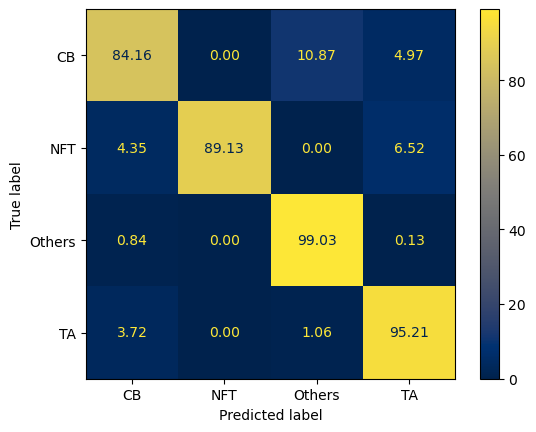

In [10]:
plot = ConfusionMatrixDisplay(final_cm_t,
                              display_labels=['CB','NFT','Others','TA'])
plot.plot(cmap='cividis', values_format='.2f')         
plt.show()

In [11]:
x = np.array([[84.16149068,  0. ,  4.9689441, 10.86956522 ],
       [ 4.34782609, 89.13043478,  6.52173913,  0.        ],
       [ 3.72340426,  0.        , 95.21276596,  1.06382979],
       [ 0.83762887,  0.        ,  0.12886598, 99.03350515]])

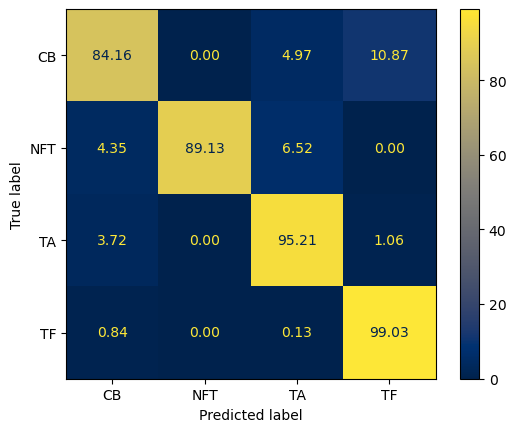

In [13]:
plot = ConfusionMatrixDisplay(x,
                              display_labels=['CB','NFT','TA','TF'])
plot.plot(cmap='cividis', values_format='.2f')         
plt.show()

In [14]:
model = loaded_model
# Confusion matrix across 10 folds, WITH thresholding 
print('Macro avg F1 ', 
      mean([i['macro avg']['f1-score'] for i in model.cv_reportsT])*100)
print('Macro avg F1 std ', 
      np.std([i['macro avg']['f1-score'] for i in model.cv_reportsT])*100)

print("--------------------------")
print('Macro avg precision',
      mean([i['macro avg']['precision'] for i in model.cv_reportsT])*100)
print('Macro avg precision std',
      np.std([i['macro avg']['precision'] for i in model.cv_reportsT])*100)
print("--------------------------")
print('Macro avg recall ',
      mean([i['macro avg']['recall'] for i in model.cv_reportsT])*100)
print('Macro avg recall std',
      np.std([i['macro avg']['recall'] for i in model.cv_reportsT])*100)

Macro avg F1  92.73132961767197
Macro avg F1 std  3.718261821632216
--------------------------
Macro avg precision 94.35912018814683
Macro avg precision std 2.435345067073568
--------------------------
Macro avg recall  92.09381413395488
Macro avg recall std 4.94546004320518


In [15]:
model = loaded_model
# Confusion matrix across 10 folds, WITH NO thresholding 
print('Macro avg F1 ', 
      mean([i['macro avg']['f1-score'] for i in model.cv_reports])*100)
print('Macro avg F1 std ', 
      np.std([i['macro avg']['f1-score'] for i in model.cv_reports])*100)

print("--------------------------")
print('Macro avg precision',
      mean([i['macro avg']['precision'] for i in model.cv_reports])*100)
print('Macro avg precision std',
      np.std([i['macro avg']['precision'] for i in model.cv_reports])*100)
print("--------------------------")
print('Macro avg recall ',
      mean([i['macro avg']['recall'] for i in model.cv_reports])*100)
print('Macro avg recall std',
      np.std([i['macro avg']['recall'] for i in model.cv_reports])*100)

Macro avg F1  85.61027302292774
Macro avg F1 std  6.098672313658407
--------------------------
Macro avg precision 90.04884951077074
Macro avg precision std 4.6148586341206785
--------------------------
Macro avg recall  85.55303865244521
Macro avg recall std 6.789240145327252


Plotting feature importance

In [16]:
import seaborn as sns

In [17]:
model_rf = joblib.load('/Users/mokur/OneDrive - University of Cambridge/Attachments/Jan2023/Tau_pipeline/Tuning_parameters/Final/scripts/str_random_search.sav')

In [18]:
model_rf.best_params_

{'selector__n_features_to_select': 34,
 'clf__sampling_strategy': 'not majority',
 'clf__random_state': 42,
 'clf__n_estimators': 500,
 'clf__min_samples_split': 2,
 'clf__min_samples_leaf': 2,
 'clf__max_samples': 0.75,
 'clf__max_features': 0.6,
 'clf__max_depth': 15,
 'clf__class_weight': 'balanced'}

In [19]:
#With feature selection
rf_result = model_rf.best_estimator_.named_steps['selector'].get_support(indices=True)
rf_result
rf_result_f = [str_data.c2_X_train.columns[i] for i in rf_result]
# (rf_result_f)
importance = model_rf.best_estimator_.named_steps['clf'].feature_importances_
f_importance = pd.DataFrame(data={'features':rf_result_f,'importance':importance})
f_importance = f_importance.sort_values(by=['importance'],ascending=False)

In [20]:
f_importance_subset = f_importance[0:11]
features = [i.replace('ROI: 0.25 µm per pixel: ','') for i in f_importance_subset['features']]
f_importance_subset = f_importance_subset.copy()
f_importance_subset.loc[:,'features'] = features
f_importance_subset = f_importance_subset.rename(columns={'features':'Feature',
                                    'importance':'Importance'})

In [21]:
f_importance_subset

,Feature,Importance
0,Area µm^2,0.214311
4,Min diameter µm,0.181223
19,DAB: Mean,0.168029
20,DAB: Median,0.113468
16,DAB: Haralick Sum average (F5),0.079985
5,Blue: Mean,0.063228
21,Green: Mean,0.037543
2,Length µm,0.028842
22,Green: Median,0.021899
6,Blue: Median,0.016998


<Axes: xlabel='Importance', ylabel='Feature'>

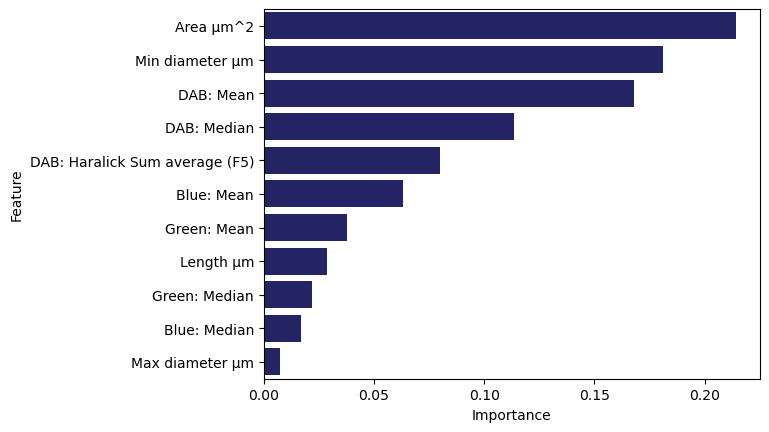

In [22]:
sns.barplot(data=f_importance_subset,
            y="Feature",
            x="Importance",
            color='midnightblue')

Finding PR-AUC

In [23]:
keys = ['split0_test_PR_AUC',
        'split1_test_PR_AUC',
        'split2_test_PR_AUC',
        'split3_test_PR_AUC',
        'split4_test_PR_AUC',
        'split5_test_PR_AUC',
        'split6_test_PR_AUC',
        'split7_test_PR_AUC',
        'split8_test_PR_AUC',
        'split9_test_PR_AUC']
pr_val = []
for i in keys:
    pr_val.append(model_rf.cv_results_[i][model_rf.best_index_])

In [24]:
print(model_rf.cv_results_['mean_test_PR_AUC'][model_rf.best_index_]*100)
print('mean pr:', mean(pr_val)*100)
print('std pr:', np.std(pr_val)*100)

97.49848406191826
mean pr: 97.49848406191826
std pr: 1.1518569594079722
